In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:

# ----------------------------
# Load Dataset
# ----------------------------
data = pd.read_csv("apple_products.csv")
print(data.head())


                               Product Name  \
0         APPLE iPhone 8 Plus (Gold, 64 GB)   
1  APPLE iPhone 8 Plus (Space Grey, 256 GB)   
2      APPLE iPhone 8 Plus (Silver, 256 GB)   
3           APPLE iPhone 8 (Silver, 256 GB)   
4             APPLE iPhone 8 (Gold, 256 GB)   

                                         Product URL  Brand  Sale Price  \
0  https://www.flipkart.com/apple-iphone-8-plus-g...  Apple       49900   
1  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
2  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
3  https://www.flipkart.com/apple-iphone-8-silver...  Apple       77000   
4  https://www.flipkart.com/apple-iphone-8-gold-2...  Apple       77000   

     Mrp  Discount Percentage  Number Of Ratings  Number Of Reviews  \
0  49900                    0               3431                356   
1  84900                    0               3431                356   
2  84900                    0               3431     

In [5]:

# ----------------------------
# Check Missing Values
# ----------------------------
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64


In [6]:

# ----------------------------
# Descriptive Statistics
# ----------------------------
print("\nDescriptive Statistics:")
print(data.describe())



Descriptive Statistics:
          Sale Price            Mrp  Discount Percentage  Number Of Ratings  \
count      62.000000      62.000000            62.000000          62.000000   
mean    80073.887097   88058.064516             9.951613       22420.403226   
std     34310.446132   34728.825597             7.608079       33768.589550   
min     29999.000000   39900.000000             0.000000         542.000000   
25%     49900.000000   54900.000000             6.000000         740.000000   
50%     75900.000000   79900.000000            10.000000        2101.000000   
75%    117100.000000  120950.000000            14.000000       43470.000000   
max    140900.000000  149900.000000            29.000000       95909.000000   

       Number Of Reviews  Star Rating  
count          62.000000    62.000000  
mean         1861.677419     4.575806  
std          2855.883830     0.059190  
min            42.000000     4.500000  
25%            64.000000     4.500000  
50%           180.00000

In [7]:

# ----------------------------
# Highest Rated iPhones
# ----------------------------
highest_rated = data.sort_values(by="Star Rating", ascending=False).head(10)

print("\nTop 10 Highest Rated iPhones:")
print(highest_rated["Product Name"])
print(highest_rated)



Top 10 Highest Rated iPhones:
20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object
                                        Product Name  \
20   APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)   
17       APPLE iPhone 11 Pro Max (Space Grey, 64 GB)   
16  APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)   
15             APPLE iPhone 11 Pro Max (Gold, 64 GB)   
14            APPLE iPhone 11 Pro Max (Gold, 256 GB)   
0                  APPLE iPhone 8 Plus (Gold, 64 

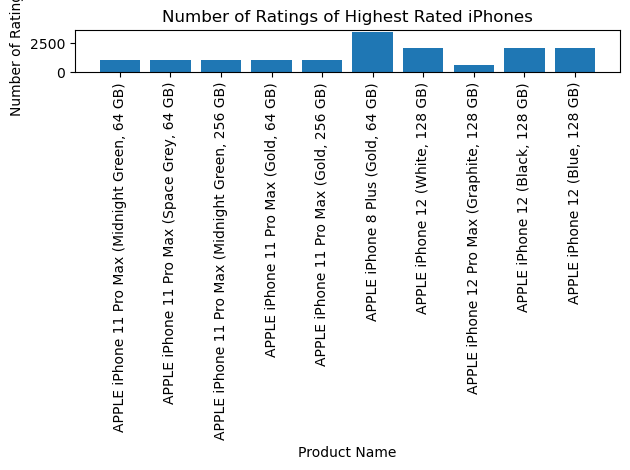

In [8]:

# ----------------------------
# Number of Ratings (Bar Plot)
# ----------------------------
plt.figure()
plt.bar(highest_rated["Product Name"], highest_rated["Number Of Ratings"])
plt.title("Number of Ratings of Highest Rated iPhones")
plt.xlabel("Product Name")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


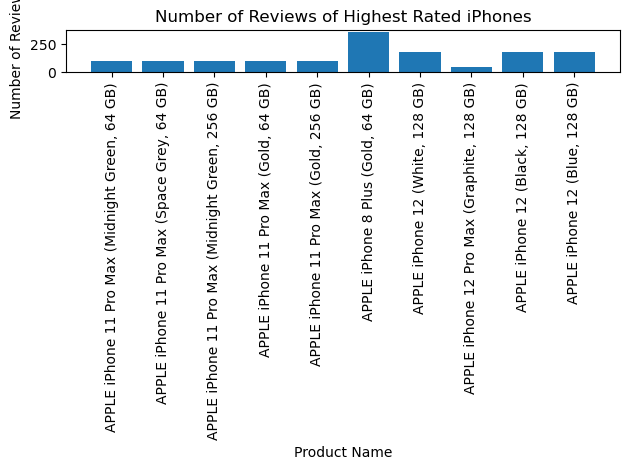

In [9]:

# ----------------------------
# Number of Reviews (Bar Plot)
# ----------------------------
plt.figure()
plt.bar(highest_rated["Product Name"], highest_rated["Number Of Reviews"])
plt.title("Number of Reviews of Highest Rated iPhones")
plt.xlabel("Product Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


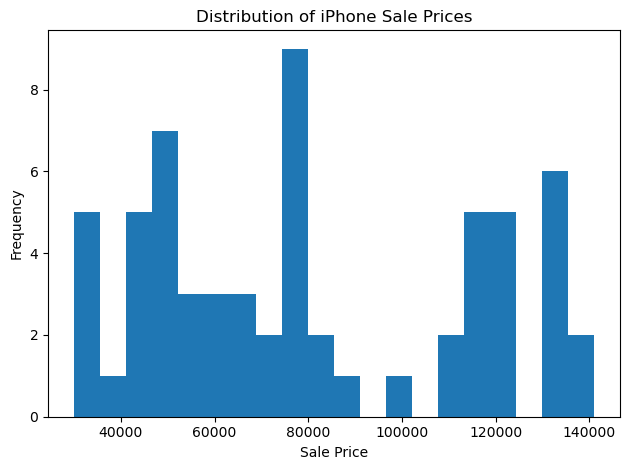

In [10]:

# ----------------------------
# Sale Price Distribution
# ----------------------------
plt.figure()
plt.hist(data["Sale Price"], bins=20)
plt.title("Distribution of iPhone Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


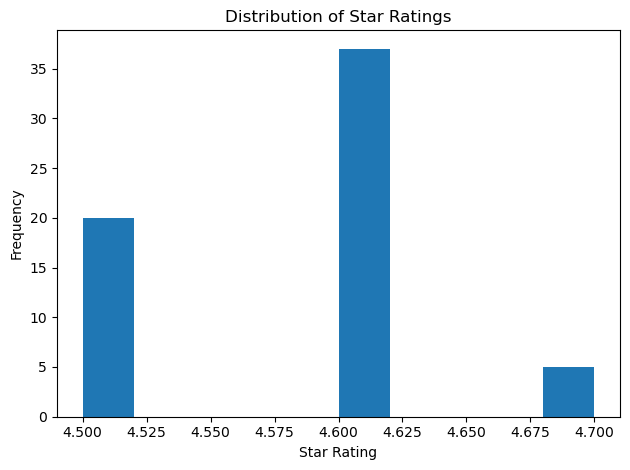

In [11]:

# ----------------------------
# Star Rating Distribution
# ----------------------------
plt.figure()
plt.hist(data["Star Rating"], bins=10)
plt.title("Distribution of Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


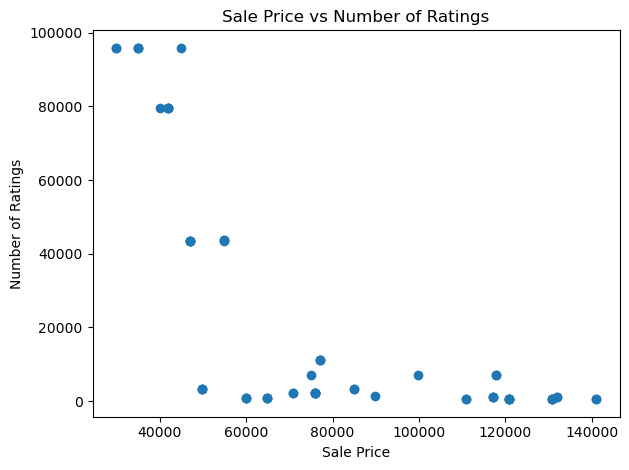

In [12]:

# ----------------------------
# Sale Price vs Number of Ratings
# ----------------------------
plt.figure()
plt.scatter(data["Sale Price"], data["Number Of Ratings"])
plt.title("Sale Price vs Number of Ratings")
plt.xlabel("Sale Price")
plt.ylabel("Number of Ratings")
plt.tight_layout()
plt.show()


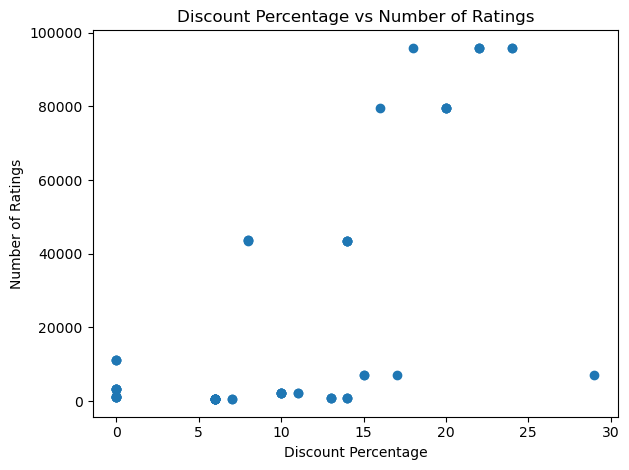

In [13]:

# ----------------------------
# Discount Percentage vs Number of Ratings
# ----------------------------
plt.figure()
plt.scatter(data["Discount Percentage"], data["Number Of Ratings"])
plt.title("Discount Percentage vs Number of Ratings")
plt.xlabel("Discount Percentage")
plt.ylabel("Number of Ratings")
plt.tight_layout()
plt.show()


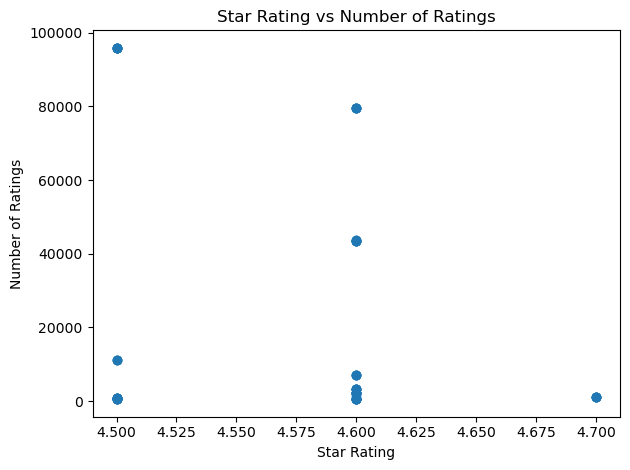

In [14]:

# ----------------------------
# Star Rating vs Number of Ratings
# ----------------------------
plt.figure()
plt.scatter(data["Star Rating"], data["Number Of Ratings"])
plt.title("Star Rating vs Number of Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Number of Ratings")
plt.tight_layout()
plt.show()


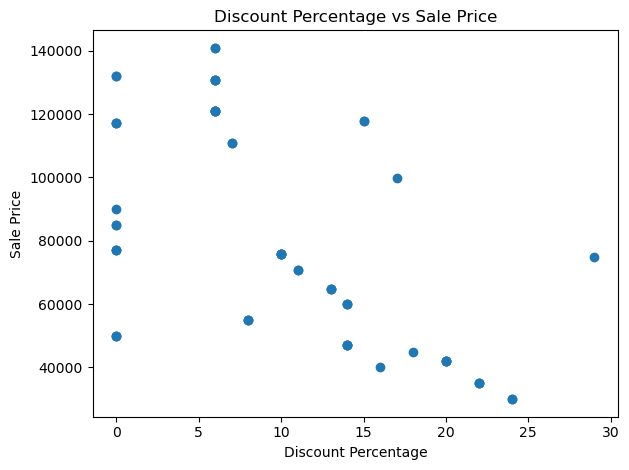

In [15]:

# ----------------------------
# Discount Percentage vs Sale Price
# ----------------------------
plt.figure()
plt.scatter(data["Discount Percentage"], data["Sale Price"])
plt.title("Discount Percentage vs Sale Price")
plt.xlabel("Discount Percentage")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()


C:\Users\RISHBAH\AppData\Local\Temp\ipykernel_20076\3178598819.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


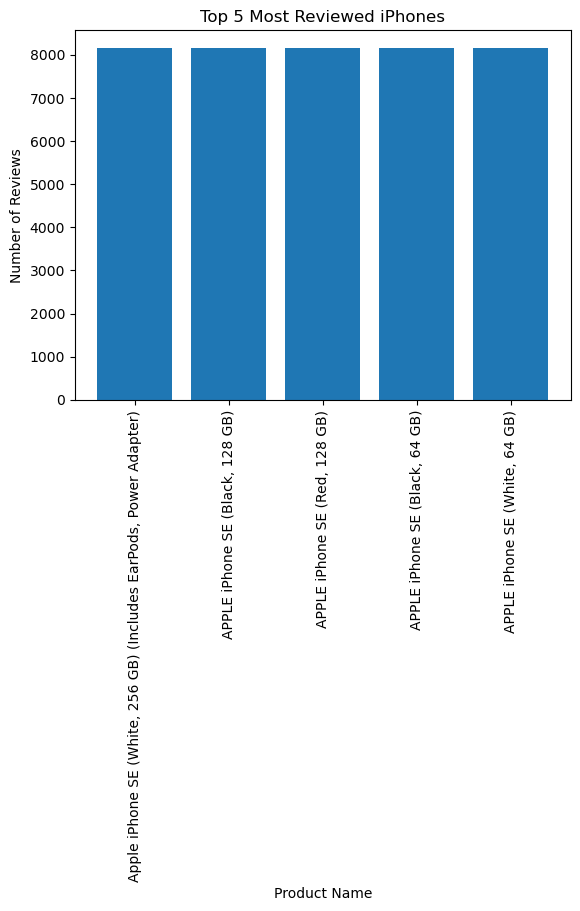

In [16]:

# ----------------------------
# Top 5 Most Reviewed iPhones
# ----------------------------
top_reviewed = data.sort_values(by="Number Of Reviews", ascending=False).head(5)

plt.figure()
plt.bar(top_reviewed["Product Name"], top_reviewed["Number Of Reviews"])
plt.title("Top 5 Most Reviewed iPhones")
plt.xlabel("Product Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


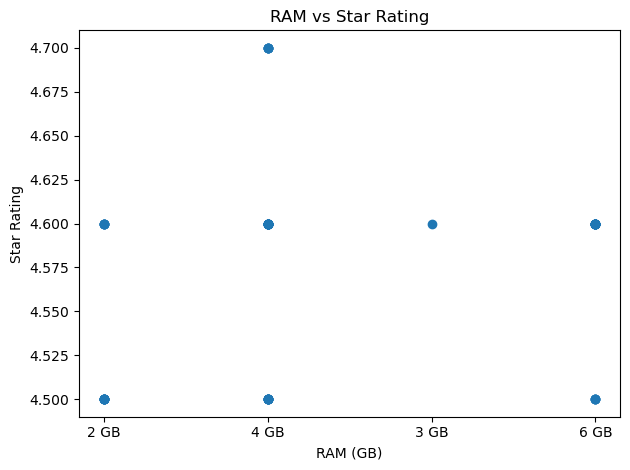

In [17]:

# ----------------------------
# RAM vs Star Rating
# ----------------------------
plt.figure()
plt.scatter(data["Ram"], data["Star Rating"])
plt.title("RAM vs Star Rating")
plt.xlabel("RAM (GB)")
plt.ylabel("Star Rating")
plt.tight_layout()
plt.show()


In [21]:

# ----------------------------
# Most & Least Expensive iPhones
# ----------------------------
most_expensive = data.loc[data["Sale Price"].idxmax()]
least_expensive = data.loc[data["Sale Price"].idxmin()]

print("\nMost Expensive Product:")
print(most_expensive)

print("\nLeast Expensive Product:")
print(least_expensive)



Most Expensive Product:
Product Name                        APPLE iPhone 12 Pro (Silver, 512 GB)
Product URL            https://www.flipkart.com/apple-iphone-12-pro-s...
Brand                                                              Apple
Sale Price                                                        140900
Mrp                                                               149900
Discount Percentage                                                    6
Number Of Ratings                                                    542
Number Of Reviews                                                     42
Upc                                                     MOBFWBYZ5UY6ZBVA
Star Rating                                                          4.5
Ram                                                                 4 GB
Name: 24, dtype: object

Least Expensive Product:
Product Name                              APPLE iPhone SE (White, 64 GB)
Product URL            https://www.flipkart.com/a